In [46]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
#Importing the csv files into dataframes (both train and test)

dftrain = pd.read_csv("C:/Users/aryan/OneDrive/Documents/Study/College/Coding/WOC/Data Files/Linear_train.csv", header = [0])
del dftrain['Unnamed: 0']
dftest = pd.read_csv("C:/Users/aryan/OneDrive/Documents/Study/College/Coding/WOC/Data Files/Linear_test.csv", header = [0])
del dftest['Unnamed: 0']

In [48]:
#Defining X and Y

Xtrain = dftrain.iloc[:,:-1].transpose()
Ytrain = dftrain.iloc[:,-1]
examples = len(Xtrain.columns)
features = len(Xtrain)

In [49]:
#Appending row with all ones to Xtrain

Xones = np.ones((1,examples))
Xtrain = pd.DataFrame(np.concatenate([Xones, Xtrain.to_numpy()])) 

In [50]:
#Applying Mean Normalization on the training data

for i in range(1,features+1):
    rowmin = Xtrain.iloc[i,:].min()
    rowmax = Xtrain.iloc[i,:].max()
    rowmean = Xtrain.iloc[i,:].mean()
    valrng = rowmax - rowmin
    Xtrain.iloc[i,:] -= rowmin
    Xtrain.iloc[i,:] -= rowmean
    Xtrain.iloc[i,:] /= valrng
    newmax = Xtrain.iloc[i,:].max()
    newmin = Xtrain.iloc[i,:].min()
    if newmax >= 1 or newmin <= -1:
        if newmax > -newmin:
            Xtrain.iloc[i,:] /= newmax
        else:
            Xtrain.iloc[i,:] /= newmin

In [58]:
#Applying linear regression on the dataset

X = Xtrain.to_numpy()
Y = Ytrain.to_numpy().reshape(examples, 1)
theta = np.random.randn(features+1, 1)
iteration = 20000
learningrate = 0.005
def linear(X, Y, theta, learningrate, iteration):
    costlist = []
    for i in range(iteration):
        y_pred = np.dot(X.T, theta)
        cost = (1/(2*examples))*(np.sum(np.square(y_pred - Y)))
        pdcost = (1/examples)*np.dot(X, y_pred - Y)
        temptheta = theta - learningrate*pdcost
        theta = temptheta
        costlist.append(cost)
    return theta, y_pred, costlist

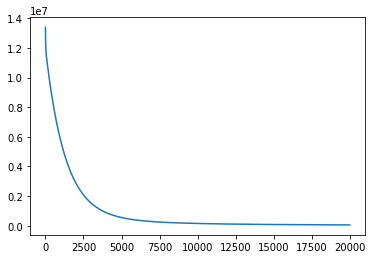

In [59]:
#Extracting theta, prediction and cost, and plotting the cost versus iterations graph

theta, y_pred, costlist = linear(X, Y, theta, learningrate, iteration)
plt.plot([i for i in range(iteration)], costlist)
plt.show()

In [60]:
#Defining X and Y for the test data

Xtest = dftest.iloc[:,:-1].transpose()
Ytest = dftest.iloc[:,-1]
testexamples = len(Xtest.columns)
testfeatures = len(Xtest)

In [61]:
#Appending row with all ones to Xtrain

Xonestest = np.ones((1,testexamples))
Xtest = pd.DataFrame(np.concatenate([Xonestest, Xtest.to_numpy()]))

In [62]:
#Applying Mean Normalization on the testing data

for i in range(1,features+1):
    rowmin = Xtest.iloc[i,:].min()
    rowmax = Xtest.iloc[i,:].max()
    rowmean = Xtest.iloc[i,:].mean()
    valrng = rowmax - rowmin
    Xtest.iloc[i,:] -= rowmin
    Xtest.iloc[i,:] -= rowmean
    Xtest.iloc[i,:] /= valrng

In [63]:
#Using the theta on Xtest

X_test = Xtest.to_numpy()
Ypredfinal = np.dot(X_test.T, theta)

In [64]:
#Finding the error

Yfinal = Ytest.to_numpy().reshape(testexamples, 1)
rmserror = np.sqrt((np.sum(np.square(Yfinal - Ypredfinal)))/testexamples)
print(rmserror)

22136.144593270867
